In [1]:
from numpy.random import normal, seed, choice
from scipy.stats import norm
import seaborn as sns
import pandas as pd
seed(42)

In [2]:
# dados do indice bovespa

In [3]:
bovespa = pd.read_csv('./data/^BVSP-5Y.csv', index_col='Date', parse_dates = ['Date'])
bovespa.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
#bovespa

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


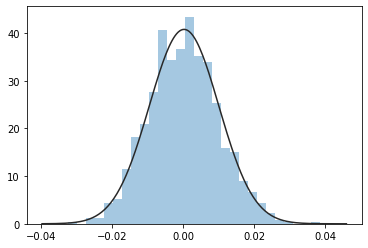

In [4]:
random_returns = normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False);

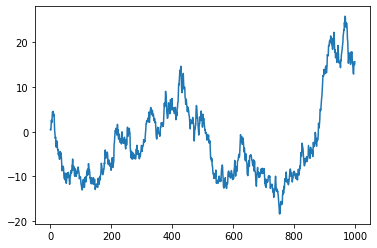

In [5]:
return_series = pd.Series(random_returns)

random_prices = return_series.add(1).cumprod().sub(1)

random_prices.mul(100).plot();

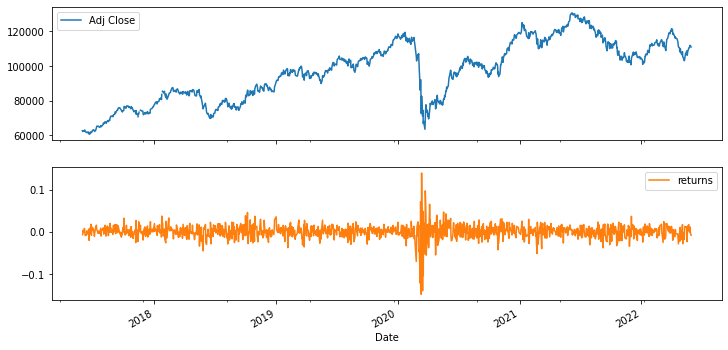

In [7]:
bovespa['returns'] = bovespa['Adj Close'].pct_change()

bovespa[['Adj Close', 'returns']].plot(subplots=True, figsize=(12, 6));

In [8]:
# bolsa retotno e distribuição

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


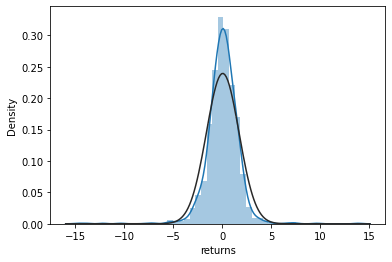

In [9]:
sns.distplot(bovespa['returns'].dropna().mul(100), fit=norm);

In [10]:
sample = bovespa['returns'].dropna()

n_obs = bovespa['returns'].count()

random_walk = choice(sample, size=n_obs)

random_walk = pd.Series(random_walk, index=sample.index)

random_walk.head()

Date
2017-06-01    0.001780
2017-06-02   -0.003390
2017-06-05   -0.005864
2017-06-06    0.002638
2017-06-07    0.002091
dtype: float64

In [11]:
start = bovespa['Adj Close'].first('D')
start

Date
2017-05-31    62711.0
Name: Adj Close, dtype: float64

In [12]:
bovespa_random = start.append(random_walk.add(1))

bovespa.head()

,Adj Close,returns
Date,,
2017-05-31,62711.0,NaN
2017-06-01,62289.0,-0.006729
2017-06-02,62511.0,0.003564
2017-06-05,62450.0,-0.000976
2017-06-06,62955.0,0.008086


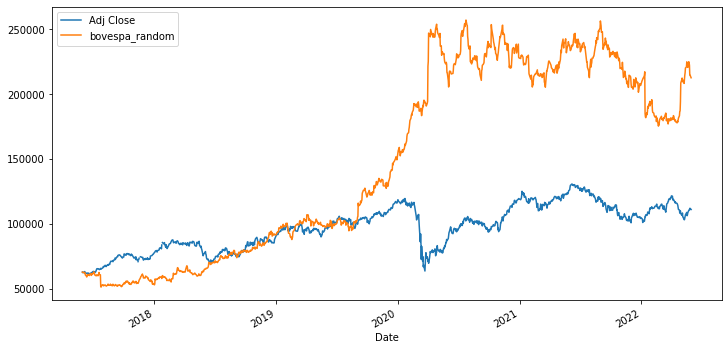

In [13]:
bovespa['bovespa_random'] = bovespa_random.cumprod()

bovespa[['Adj Close', 'bovespa_random']].plot(figsize=(12, 6));